   # Tasks-2:
                                             
### Predict Scores if a student study for 9.25hrs in a day

## Importing all required Package

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



## Reading CSV Data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")



In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
df.shape


(25, 2)

In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Plotting the Data

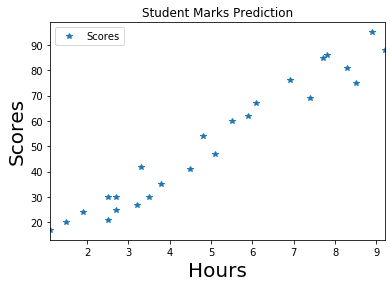

In [7]:
df.plot(x='Hours', y='Scores',style="*")
plt.title('Student Marks Prediction')
plt.xlabel('Hours', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.show()

## Preparing data
### Let's divide the data into attributes and level

In [8]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, 1].values

## Splitting the data
### Now we split  the data into test and train data

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

## Training the algorithm
### We have splitted our data into training and testing set, and now its finally time to train our algorithm

In [10]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Retriving intercept and slope

In [11]:
print(regressor.intercept_)
print(regressor.coef_)

2.018160041434662
[9.91065648]


## Regression Line after training dataset


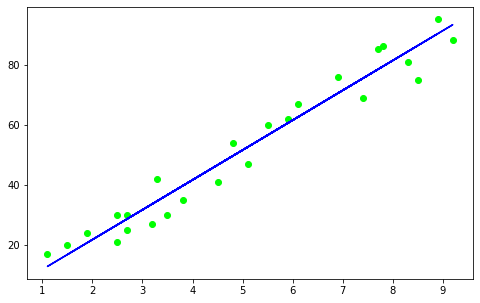

In [12]:
reg_line = regressor.intercept_ + regressor.coef_*X

plt.figure(figsize=(8,5))
plt.scatter(X,Y,color='lime')
plt.plot(X, reg_line, color='b')
plt.show()

## Making Prediction from the tested data

In [13]:
Y_predict = regressor.predict(X_test)
dfs = pd.DataFrame({'Actual':Y_test,'Predicted':Y_predict})
dfs

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
Predict_Score = regressor.predict([[9.25]])
print("Predicted Score is",Predict_Score)

Predicted Score is [93.69173249]


### Hence, the Predicted Score for the student is 93.69, if he/she study for 9.25hrs in a day.

## Evaluating the Algorithm
### Let's calculate Mean Absolute Error(MAE), Mean Squared Error(MSE) and Root Mean Squared Error(RMSE)

In [15]:
from sklearn import metrics
print("Mean Absolute Error",metrics.mean_absolute_error(Y_test,Y_predict))
print("Mean Squared Error",metrics.mean_squared_error(Y_test,Y_predict))
print("Root Mean Squared Error",np.sqrt(metrics.mean_squared_error(Y_test,Y_predict)))          

Mean Absolute Error 4.183859899002982
Mean Squared Error 21.598769307217456
Root Mean Squared Error 4.647447612100373


### You can see that the value of root mean squared error is 4.64, which is less than 10% of the mean value of the percentages of all the students i.e. 51.48. This means that our algorithm did a decent job.